In [5]:
import math
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# numpy

In [4]:
import numpy as np

x = np.array([[1,2,3],[4,5,6]])

print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


# scipy

In [54]:
from scipy import sparse
#単位行列
eye = np.eye(4)
print("eye:\n{}".format(eye))

eye:
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [55]:
#CSR圧縮形式の疎行列に変換
sparse_matrix = sparse.csr_matrix(eye)
print("sparse_matrix:\n{}".format(sparse_matrix))

sparse_matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [17]:
#座標格納方式 (COO)
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix(data,(row_indices, col_indices))
print("eye_coo:\n{}".format(eye_coo))

eye_coo:
  (0, 0)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0


# matplotlib

<IPython.core.display.Javascript object>


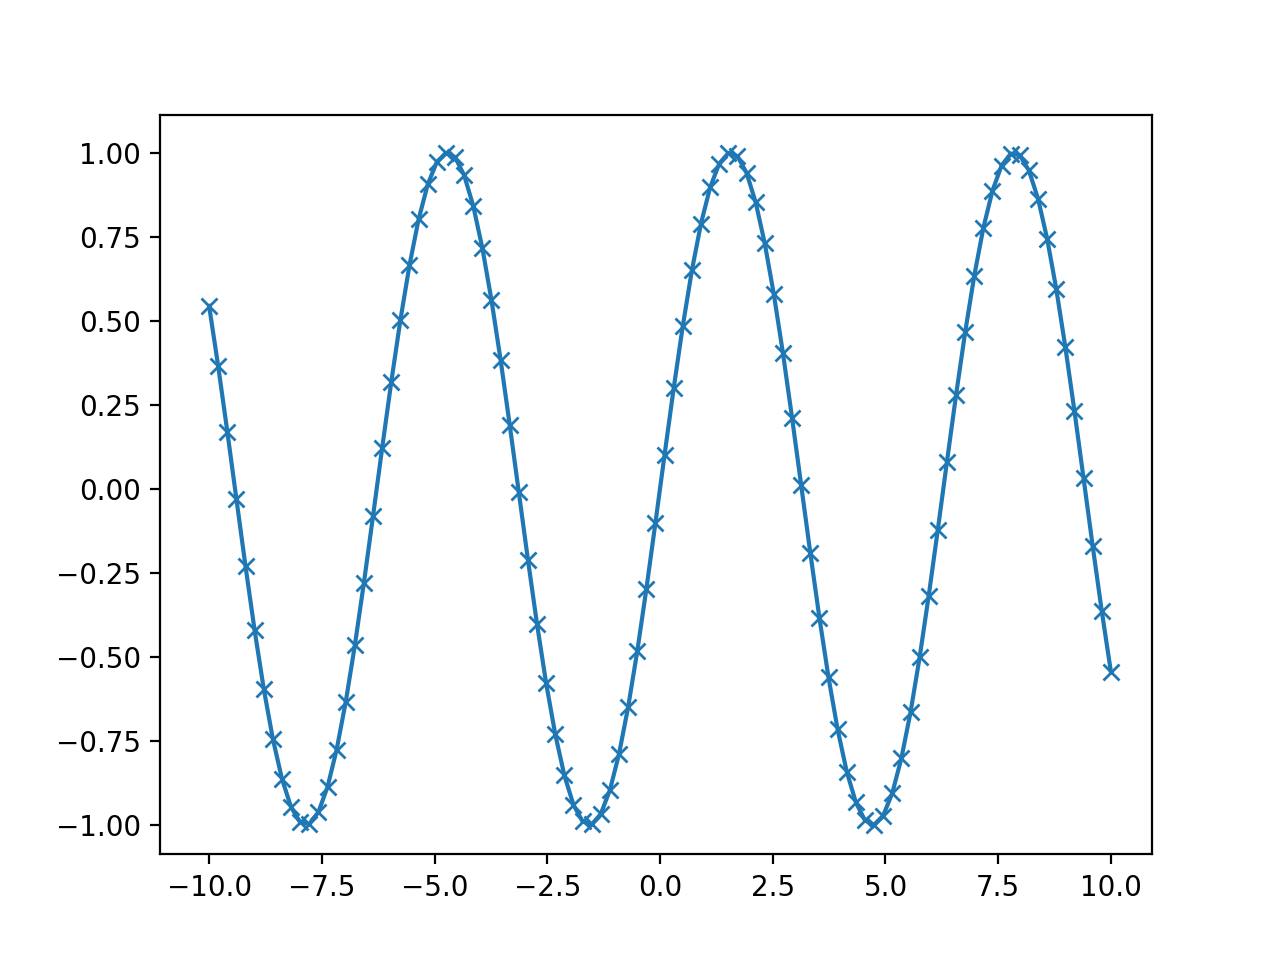

In [19]:
% matplotlib notebook
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.plot(x, y, marker="x")

# pandas

In [28]:
import pandas as pd

data = {'Name': ["John", "Anna", "Peter", "Linda"],
       'Location': ["New York", "Paris", "Berlin", "London"],
        'Age': [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
data_pandas

Age  Location   Name
0   24  New York   John
1   13     Paris   Anna
2   53    Berlin  Peter
3   33    London  Linda

==========================================

In [29]:
data_pandas[data_pandas.Age > 30]

Age Location   Name
2   53   Berlin  Peter
3   33   London  Linda

# 代表的なアルゴリズム

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [15]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

In [16]:
#K近傍法
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
knn.score(X_test, y_test)

1.0

In [17]:
#線形回帰
from sklearn.linear_model import LinearRegression
line_regression = LinearRegression().fit(X_train, y_train)
line_regression.score(X_test, y_test)

0.94860042541908784

In [18]:
#ベイズ
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb.score(X_test, y_test)

1.0

In [19]:
#決定木
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [20]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9970108161258604

In [21]:
#SVM
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

1.0

In [22]:
#nn
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver="sgd",random_state=0,max_iter=10000)
nn.fit(X_train, y_train)
nn.score(X_test, y_test)

1.0

# 距離計算

## 累乗

In [8]:
import math
pow_list = range(4)

def pow_gen(from_val, pow_list):
    for pow_val in pow_list:
        print(pow(from_val, pow_val)) #pow：累乗計算

pow_gen(2, pow_list) #2乗

1
2
4
8


## ユーグリド距離

$$d(p, q) = d(q, p) = \sqrt{ (q1- p1)^{2} + (q2- p2)^{2} ... (qn- pn)^{2}} = \sqrt{\sum_{i=1}^{n}  (qi- pi)^{2}} $$

In [16]:
def euclidean_distance(q, p, length):
    distance = 0
    n = length
    for i in range(n):
        distance += pow((q[i] - p[i]), 2)
    return math.sqrt(distance)

In [49]:
data1 = [2, 2, 2, 'a']
data2 = [4, 4, 4, 'b']
distance = euclidean_distance(data1, data2, 3)
print('Distance: ' + repr(distance))

Distance: 3.4641016151377544


# 類似度

In [34]:
import operator 
def get_neighbors(training_set, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(training_set)):
        dist = euclidean_distance(testInstance, training_set[x], length)
        distances.append((training_set[x], dist))
    print(distances)
    distances.sort(key=operator.itemgetter(1))
    print(distances)
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [50]:
training_set = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5, 'c']
k = 1
#距離が近い順に並べる
neighbors = get_neighbors(training_set, testInstance, k)
print(neighbors)

[([2, 2, 2, 'a'], 5.196152422706632), ([4, 4, 4, 'b'], 1.7320508075688772)]
[([4, 4, 4, 'b'], 1.7320508075688772), ([2, 2, 2, 'a'], 5.196152422706632)]
[[4, 4, 4, 'b']]


# クラス投票

In [45]:
def get_response(neighbors):
    class_votes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in class_votes:
            class_votes[response] += 1
        else:
            class_votes[response] = 1
    sorted_votes = sorted(class_votes.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_votes[0][0]

In [46]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
response = get_response(neighbors)
print(response)

a


# lirsデータknn(TODO)

In [2]:
# import math
# import operator
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_iris
# iris_dataset = load_iris()

# X_train, X_test, y_train, y_test = train_test_split(
#                     iris_dataset['data'], iris_dataset['target'], random_state=0)

# def euclidean_distance(q, p, length):
#     distance = 0
#     n = length
#     for i in range(n):
#         distance += pow((q[i] - p[i]), 2)
#     return math.sqrt(distance)

# def get_neighbors(training_set, testInstance, k):
#     distances = []
#     length = len(testInstance)-1
#     for x in range(len(training_set)):
#         dist = euclidean_distance(testInstance, training_set[x], length)
#         distances.append((training_set[x], dist))
# #     print(distances)
#     distances.sort(key=operator.itemgetter(1))
# #     print(distances)
#     neighbors = []
#     for x in range(k):
#         neighbors.append(distances[x][0])
#     return neighbors

# def get_response(neighbors):
#     class_votes = {}
#     for x in range(len(neighbors)):
#         response = neighbors[x][-1]
#         if response in class_votes:
#             class_votes[response] += 1
#         else:
#             class_votes[response] = 1
#     sorted_votes = sorted(class_votes.items(), key=operator.itemgetter(1), reverse=True)
#     return sorted_votes


In [3]:
# print("元データ：", X_train[0])
# #データAとデータBを比べて、距離が近い順に並べて上からk個取得
# k = 3
# neighbors = get_neighbors(X_train, X_train[0], k)
# # print(neighbors.shape)
# print(neighbors[:])
# # response = get_response(neighbors) #
# # print(response)
# #TODO:バグってる